In [2]:
import numpy as np
import matplotlib.pylab as plt

In [13]:
a= 1.
b= 0.05
c= 0.7
x = np.linspace(0, 500,501)
y = np.exp(-b*x**c)**2 - a*np.exp(-b*x**c) 

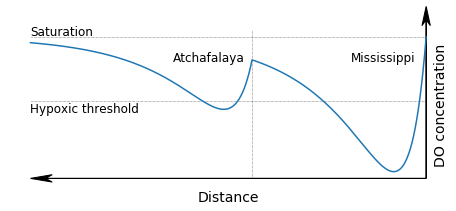

In [67]:
x = np.linspace(0, 500,501)
DOs = 7
kr = 0.1
kd = 0.026
v = 2.25
N = 1.2#e11
Nm = 2.64
Na = 1.13

def do(x,N, dx=0):
    BOD = (N*5.67 * 3.47)
    return (kd*BOD/(kr-kd))*(np.exp(-kd*(x-dx)/v)-np.exp(-kr*(x-dx)/v))
def miss(x, N=Nm):
    return DOs - do(x,N)
def atch(x, N=[Nm,Na]):
    return DOs - do(x,N[0]) - do(x,N[1], dx=220) 
y = np.piecewise(x, [x < 220, x >= 220], [lambda x:miss(x), lambda x:atch(x)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y)
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
 
# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
 
# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')
 
# wider figure for demonstration
fig.set_size_inches(7.8,3)
 
# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height
 
# manual arrowhead width and length
hw = 1./20.*(ymax-ymin) 
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang
 
# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
 
#threshholds
ax.hlines(3, 0, 500, colors='k', lw=.5, linestyles=':')
ax.text(500,2.3, "Hypoxic threshold", fontsize=12)
ax.hlines(7, 0, 500, colors='k', lw=.5, linestyles=':')
ax.text(500,7.1, "Saturation", fontsize=12)
ax.vlines(220, ymin, ymax, colors='k', lw=.5, linestyles=':')

# draw x and y axis
ax.arrow(0, ymin, 500, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
 
ax.arrow(0, ymin, 0., 1.2*ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
ax.set_xlabel('Distance', fontsize=14)
ax.set_ylabel('DO concentration', fontsize=14, labelpad=-12)
ax.yaxis.set_label_position("right")
ax.text(320,5.5, "Atchafalaya", fontsize=12)
ax.text(95,5.5, "Mississippi", fontsize=12)
# ax.text(.1,.5, "DO sag curve", transform=ax.transAxes, fontsize=14)
plt.gca().invert_xaxis()
# fig.patch.set_alpha(0.)
ax.patch.set_alpha(0.)

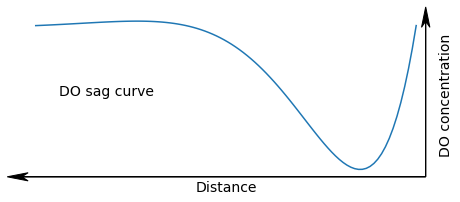

In [150]:
x = np.linspace(-1.18,1.5,100)
y = (np.sin(2*x) - np.cos(2*x))/np.exp(2*x)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(y)
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()
 
# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
 
# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
# ax.yaxis.set_ticks_position('none')
 
# wider figure for demonstration
fig.set_size_inches(7.5,3)
 
# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height
 
# manual arrowhead width and length
hw = 1./20.*(ymax-ymin) 
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang
 
# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
 
# draw x and y axis
ax.arrow(xmin - xmin*.5, ymin, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
 
ax.arrow(xmin - xmin*.5, ymin, 0., 1.5*ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 
ax.set_xlabel('Distance', fontsize=14)
ax.set_ylabel('DO concentration', fontsize=14)
ax.yaxis.set_label_position("right")
ax.text(.1,.5, "DO sag curve", transform=ax.transAxes, fontsize=14)
plt.gca().invert_xaxis()